# Convolutional Neural Networks A 

## DEEP COMPUTER VISION

in this guide we will learn how to perform image classification and object detection using deep computer vision with the convolutional neural networkd.                                                                                                 
 we will be to classify and detect images or specific objects from within the images. we will be using images data as our features and label for those images as our label or output.                                                                      
 the following concepts are important.                                                                                          
 . Image  data                                                                                                                 
 .Convolutional Layer                                                                                                           
 . Pooling Layer.                                                                                                               
 . CNN Architectures                                                                                                           
 #### the Major differnce in this type of neural networks are the layers that make them up.

### Image Data
we are going to deal with 3Dimensions  the tree dimensions are as follows:                                                         . Image height                                                                                                                 . Image Width                                                                                                                   . Color Channels -  the number of chanels represents the depth of an image and coorelates to the colors used. example an image with three channels is likely made up of rgb(red, gree, blue) pixels. So For Each Pixel we have three numeric Values in range 0 - 255 that defines its color. for an image of color depth 1 we would likely have a greyscale image with one value defining each pixel, again in the range of 0 - 255.

## Convolutional Neural Network
note: i will use the tearm convnet and convolutional neural network interchangably

this type of neural network is made up of many convolutional layers. they are different from the dense layers. the goal of this layers is to find pattens from the images that can be used to classify the image or parts of it.
    The fundamental differnce betwen  a dense layer and a convolutional layer is that dense layers detect patterns globally while convolutional layer detects patterns locally. when we have a densly connected layer each node in that layer sees all the data from the previous layer. this means that this layer is looking at all of the information and is only capable of analyzing the data in a global capacity. 
        our convolutional layer however will not be densly connectd, this means it can detect local patterns using part of input data to that layer

#### a dense neural network learns patterns that are in one specific area of an image while convolutional Neural network learns  patterns in any area of the image regardeles when the image is fliped it will still locate the patterns.

# The Convolutional Layer

 NOW creating our first Convent for this we will get famillier with CNN architectures.

### Dataset

the problem here isn to clasify 10 different everdays objects. the data set we will use is built into tensorflow and called Cifar Image dataset it contains 60,000 32 x32 color images with 6000 images of each class.
     this are the labels:
         .Airplane, Automobile, Bird,Cat, Deer, Dog, Frog, Horse, Ship, Truck

## Loading the Data set

In [1]:
!pip install tensorflow
!pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [2]:
#%tensorflow_version 3.x # comment this if your in a notebook
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

2023-08-11 16:12:59.324688: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-11 16:12:59.387161: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-11 16:12:59.389167: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-11 16:13:00.830632: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [3]:
# Load AND SPLIT DATASET
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
#Normalize pixel values to be bewteen 0 and 1
train_images, test_images = train_images/ 255.0, test_images / 255.0

class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

170498071/170498071 [==============================] - 4s 0us/step


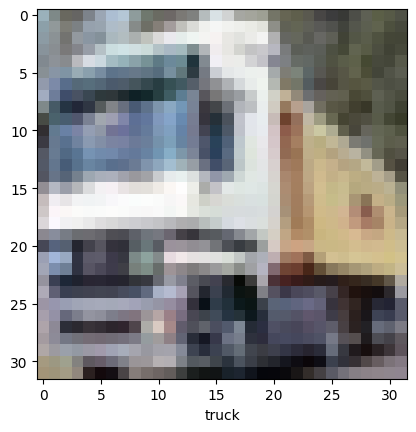

In [4]:
# lets look at one of the image
IMG_INDEX = 1 # change this to look at other images

plt.imshow(train_images[IMG_INDEX], cmap=plt.cm.binary)
plt.xlabel(class_names[train_labels[IMG_INDEX][0]])
plt.show()

## CNN Architecture
this is a stack of Conv2D and MaxPooling2D layers followed by a dense connected layers.


the Idea is to stack convolutional and maxPooling layers to extract the features from the images. this features are flattend and fed to a densly connected layers that determine the class of an image based on the presence of features.                
### Now lets start building the Convolutional Base

In [5]:
model= models.Sequential()
model.add(layers.Conv2D(32,(3,3), activation='relu', input_shape=(32,32,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3),activation= 'relu'))

### Layer 1
THIS input will be 32, 32, 3 and we will process 32 filter size 3x3 over our input data. we will apply the activation function relu to the output of each convolution operation.

### Layer 2
this will perform the max pooling operation using 2 x 2 samples and stride of 2

### Other Layers
The next set of layers do very similar things but take as input the feature map from the previous layer. they also increase the frequency of filters from 32 to 64. 
        WE Can do this as our data shrinks in spacial dimensions as it passed through the layers, meaning we can afford(computationally) to add more depth.

In [6]:
# model summary
model.summary() # lets have a look at our model so far

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
Total params: 56320 (220.00 KB)
Trainable params: 56320 

## Adding Dense Layers

now we need to take these extracted features and add a way to classify them. 

In [7]:
model.add(layers.Flatten())
model.add(layers.Dense(64,activation = 'relu'))
model.add(layers.Dense(10))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

## Training

In [9]:
#we will train and compile the model using the recommended hyper paramaters from tensorflow NB this will take much longer
model.compile(optimizer='adam',
             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
             metrics= ['accuracy'])
history = model.fit(train_images, train_labels, epochs = 5,
                   validation_data=(test_images,test_labels))

Epoch 1/5
1563/1563 [==============================] - 54s 34ms/step - loss: 1.5330 - accuracy: 0.4412 - val_loss: 1.2649 - val_accuracy: 0.5514
Epoch 2/5
1563/1563 [==============================] - 47s 30ms/step - loss: 1.1736 - accuracy: 0.5851 - val_loss: 1.1179 - val_accuracy: 0.6051
Epoch 3/5
1563/1563 [==============================] - 46s 30ms/step - loss: 1.0215 - accuracy: 0.6413 - val_loss: 1.0207 - val_accuracy: 0.6405
Epoch 4/5
1563/1563 [==============================] - 46s 30ms/step - loss: 0.9251 - accuracy: 0.6766 - val_loss: 0.9488 - val_accuracy: 0.6718
Epoch 5/5
1563/1563 [==============================] - 46s 29ms/step - loss: 0.8545 - accuracy: 0.7019 - val_loss: 0.9137 - val_accuracy: 0.6867


# Evaluating the Model
we can determine how well the model performed by looking at its performance on the test data set

In [10]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(test_acc)
# you should be getting the accuracy of about 70 %  for this model of computer vision

313/313 - 2s - loss: 0.9137 - accuracy: 0.6867 - 2s/epoch - 8ms/step
0.6866999864578247


# WORKING with small Datasets


in this situationwhere you do not have millions of data  to train a CNN from scratch that pertforms well. this is why we will learn about a few techniques we can use to train CNN on small datasets or just a few thousands

# Data Augmentation

to avoid overfitting a model and create a larger data set from a smaller one we can use a technique called data augmentation. this is simplly performining random transformation on our images so that our model can generalize better this transormations can be things like compressions, rotations, stretches and even color changers.
### this is done with Keras

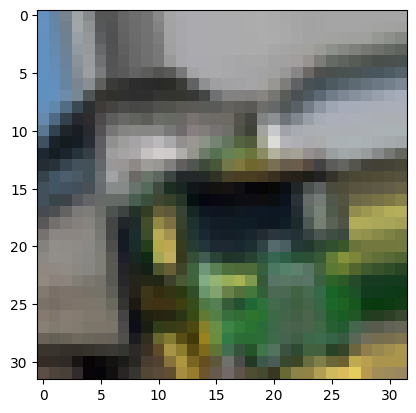

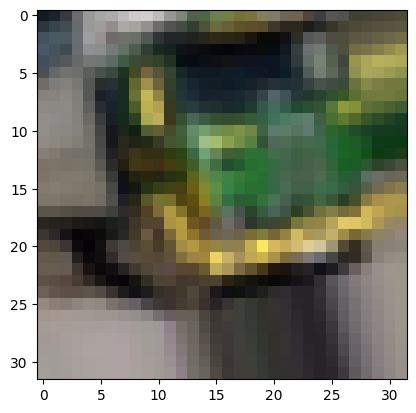

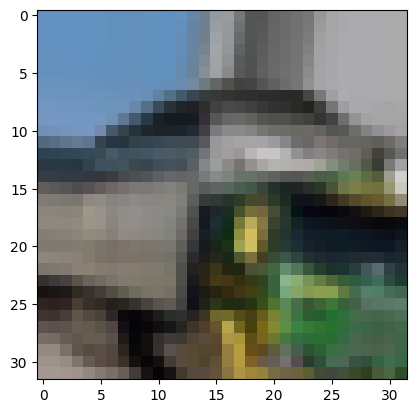

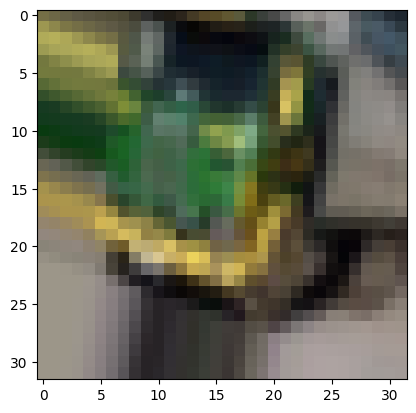

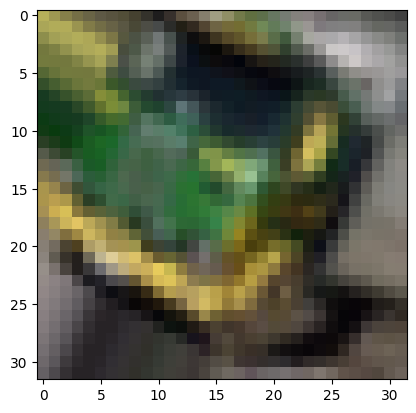

In [11]:
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

# creates a data generator that trasnforms images
datagen = ImageDataGenerator(rotation_range = 40,
                            width_shift_range=0.2,
                            height_shift_range=0.2,
                            shear_range = 0.2,
                            zoom_range= 0.2,
                            horizontal_flip = True,
                            fill_mode = 'nearest')
#pick an image to transform
test_img = train_images[14]
img = image.img_to_array(test_img)# convert image to numpy array
img = img.reshape((1,) + img.shape)#reshape image

i = 0

for batch in datagen.flow(img, save_prefix ='test', save_format = 'jpeg'): # this loop runs forever untill we breake, savimg images to current directory
    plt.figure(i)
    plot = plt.imshow(image.img_to_array(batch[0]))
    i+=1
    if i > 4: # show 4 images
        break
plt.show()


### PRETRAINED Models

Now we will talk about using pretrained CNN as Part of our own custom network this is to improve the accuracy of our model. we Know that  CNN's alone (with no dense layers) don't do anaything other than map the pressence of features. this means we can use pretraiend CNN, onet that has been traiend on millions of images as the start of our model. this will allow as to have a very good Convolutional base befor adding our own dense layerd Calssifier at the end. by using this we can train a very good classifier for a relatively small dataset. this is becouse the covent already has a good idea of what features to look for in an image? and can find them effectively

### Fine Tuning

Now here lets say a model trained by Google we take that model half of it and use it to train our model. and by this we just tune the last lines of the model or we tune it by either adding some  data

# Using A Pretrained Model
now we combine  what we have learned above and use a pretraiend model and fine tuning to classify images of dogs and cats using a samall fairly data

In [13]:
#imports
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
keras = tf.keras

### Dataset
we will now load a data set of cats_vs_dogs from the module tensorflow_datasets
this data set contains(image,label) pairs where images have different dimensions and 3 color channels

In [17]:
!pip install tensorflow_datasets

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 42.1 MB/s eta 0:00:00:00:010:01
  Obtaining dependency information for array-record from https://files.pythonhosted.org/packages/64/5c/bc2130553b344c91e5cd36946e9996b0f1bdaca1c2e046bef76ec1e0e3cc/array_record-0.4.1-py39-none-any.whl.metadata
  Obtaining dependency information for click from https://files.pythonhosted.org/packages/1a/70/e63223f8116931d365993d4a6b7ef653a4d920b41d03de7c59499962821f/click-8.1.6-py3-none-any.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.0/153.0 kB 7.0 MB/s eta 0:00:00
  Obtaining dependency information for etils[enp,epath]>=0.9.0 from https://files.pythonhosted.org/packages/4a/6a/d58ec120f5e4babbf5001c144266ba623dcdae8e81dc6cdb422a98d0e0ce/etils-1.4.1-py3-none-any.whl.metadata
  Preparing metadata (setup.py) ... - \ done
  Obtaining dependency information for tensorflow-metadata from https://files.pythonh

In [20]:
import tensorflow_datasets as tfds
tfds.disable_progress_bar()
# split the data manually into 80% training, 10% testing, 10% Validation
(raw_train, raw_validation, raw_test), metadata = tfds.load(
    'cats_vs_dogs',
    split=['train[:80%]', 'train[80%:90%]', 'train[90%:]'],
    with_info=True,
    as_supervised=True,
)

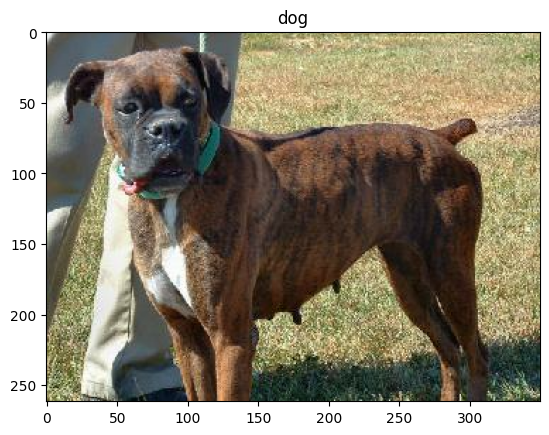

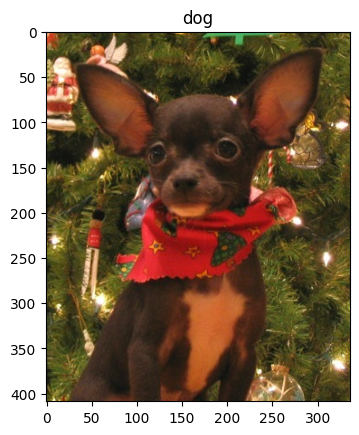

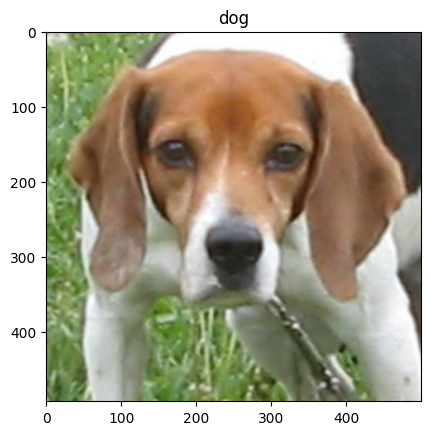

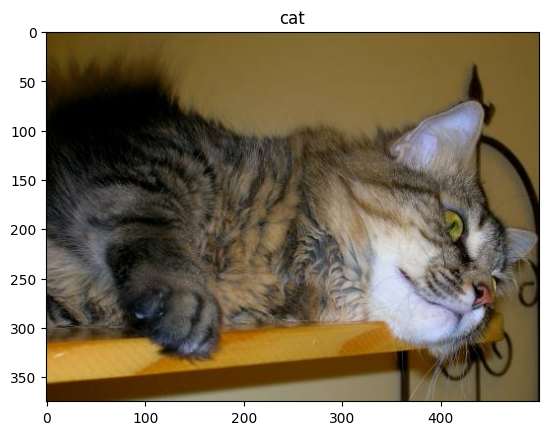

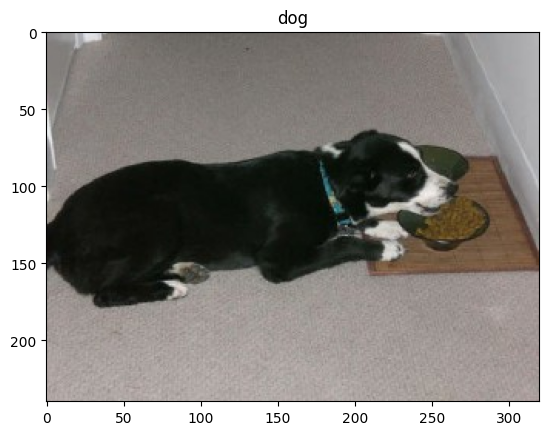

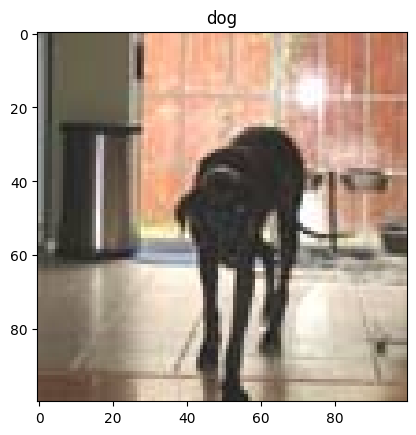

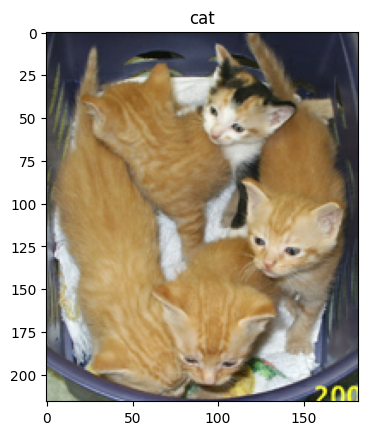

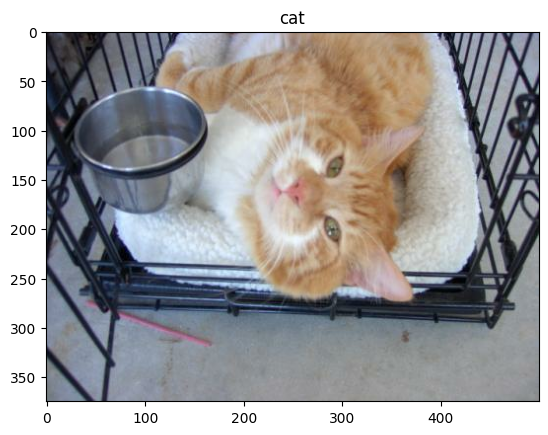

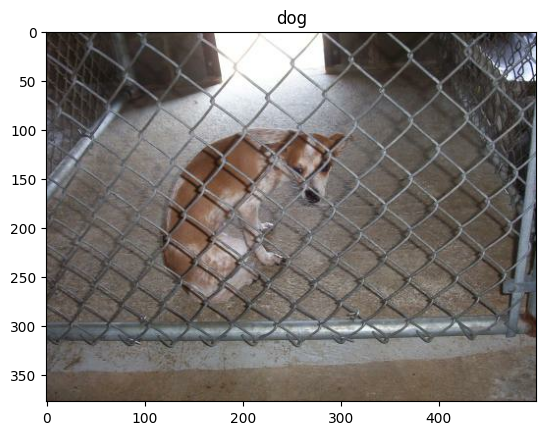

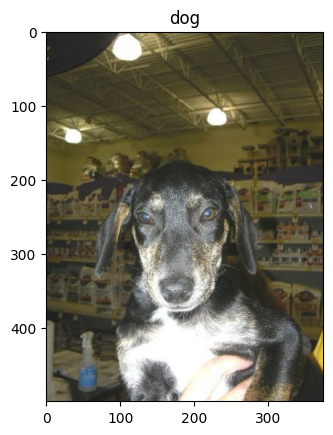

In [22]:
get_label_name = metadata.features['label'].int2str # this creates a function object that we can use to get labels

#display 2 images from the dataset
for image, label in raw_train.take(10):
    plt.figure()
    plt.imshow(image)
    plt.title(get_label_name(label))

### Data Processing
since  the sizes of the images are deffernet we need to convert them to the same size.  below is the function to do that

In [31]:
IMG_SIZE =160 # ALL images will resized to 160 x 160
def formart_example(image, label): # re sizing the image to a smaller image is better than making it larger image
    """ 
    Returns an image that is reshaped to IMG_SIZE
    """
    image = tf.cast(image,tf.float32)
    image=(image / 127.5) - 1  #this is exactly half of 225
    image = tf.image.resize(image,(IMG_SIZE, IMG_SIZE))
    return image,label

Now we can apply this functionto all our images using Map

In [32]:
train = raw_train.map(formart_example) # MAP BASICALLY TAKES EVERY COMMPONENT IN THE RAW_TRAIN AND APPLYS THE FUNCTION FORMART_EXAMPLE
validation = raw_validation.map(formart_example)
test = raw_test.map(formart_example)

Now checking the images

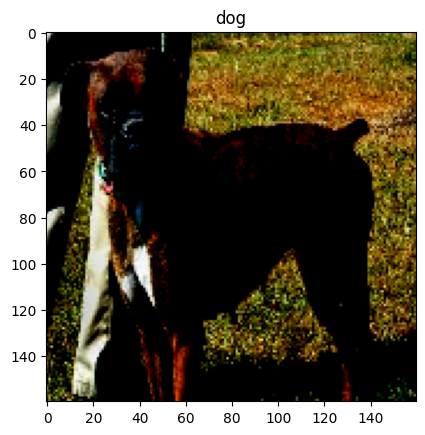

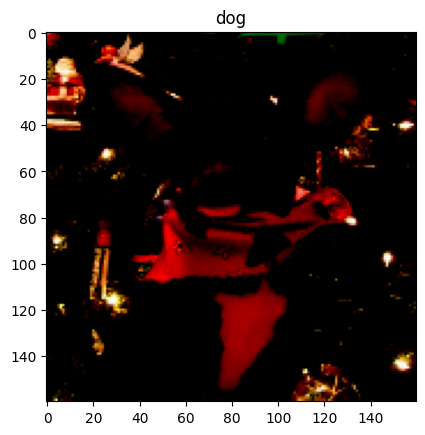

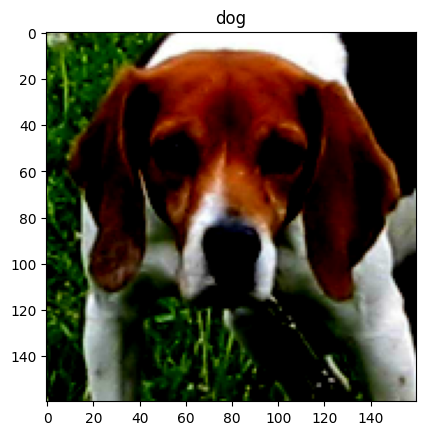

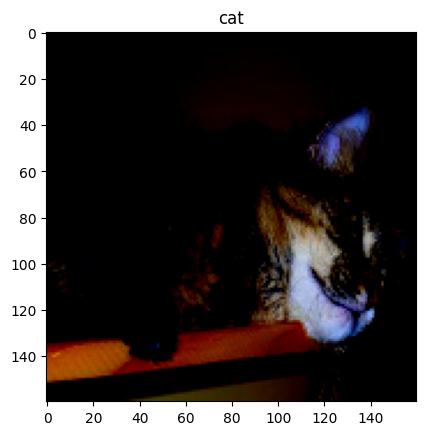

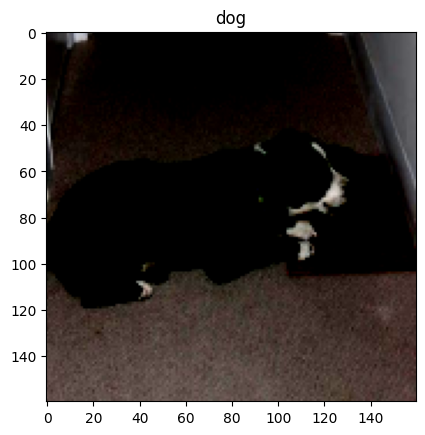

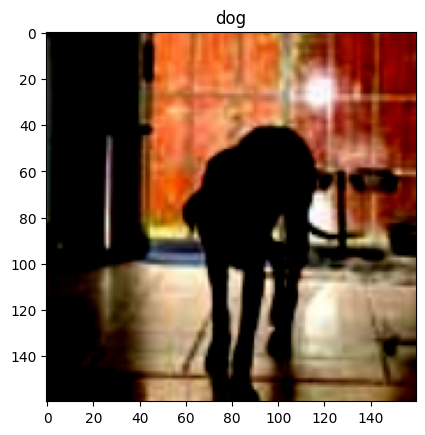

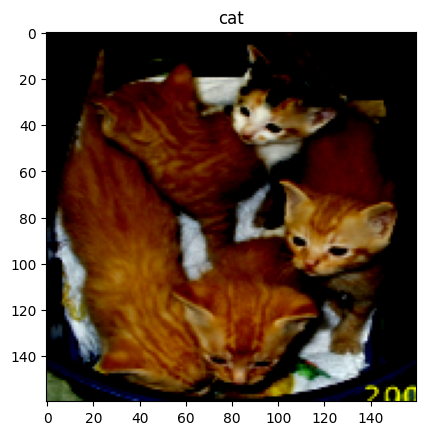

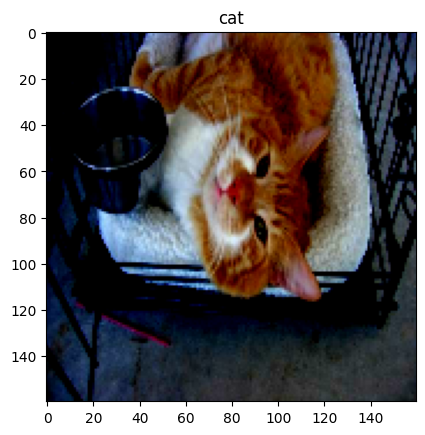

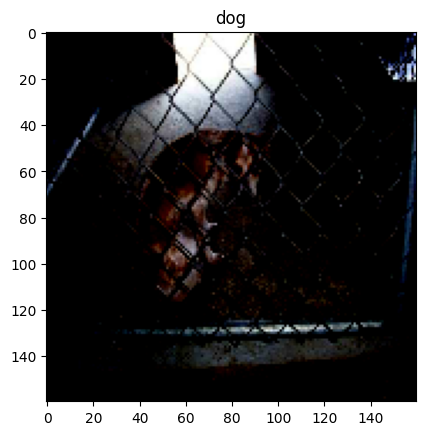

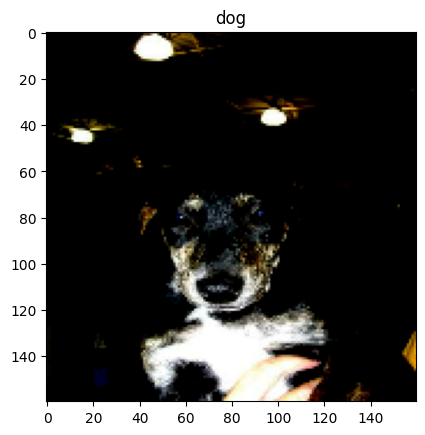

In [33]:
for image, label in train.take(10):
    plt.figure()
    plt.imshow(image)
    plt.title(get_label_name(label))

Finally we shuffle and batch the images

In [34]:
BATCH_SIZE = 32
SHUFFLE_BUFFER_SIZE = 1000

train_batches = train.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE)
validation_batches = validation.batch(BATCH_SIZE)
test_batches = test.batch(BATCH_SIZEB)

Now we look at the shape of an original image vs new image

In [35]:
for img, label in raw_train.take(2):
    print('Original shape: ', img.shape)
for img, label in train.take(2):
    print('New shape: ', img.shape) # we will see that the images have changed shape to 160 x 160

Original shape:  (262, 350, 3)
Original shape:  (409, 336, 3)
New shape:  (160, 160, 3)
New shape:  (160, 160, 3)


## Picking a Pretrained Model
the model we will use as the convolutional base for our model is the MobileNet V2 developed by Google(this model is traiend on 1.4 million images and has 1000 different classes)
# 
we only want to use this models Convolutional base so when we load the model we have to specify we dont want the top classificationlayer.  we will tell the model what input shape to expect and to use the predetermined weights from imagenet(Googles Dataset)


In [36]:
IMG_SHAPE = (IMG_SIZE, IMG_SIZE, 3)

#Create the base model from the pre-trained model MobileNet V2
base_model = tf.keras.applications.MobileNetV2(input_shape= IMG_SHAPE, 
                                                include_top= False,
                                                weights= 'imagenet')

9406464/9406464 [==============================] - 0s 0us/step


In [37]:
base_model.summary()

Model: "mobilenetv2_1.00_160"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 160, 160, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 80, 80, 32)           864       ['input_1[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 80, 80, 32)           128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 80, 80, 32)           0         ['bn_Conv1[

at this point this model will simply output a shape(32,5,5,1280) tensor that is a feature extractionfrom our original(1,160,160,3) image. this 32 means we have 32 layers of differnt filters/ features

In [38]:
for image, _ in train_batches.take(1):
    pass
feature_batch = base_model(image)
print(feature_batch.shape)

(32, 5, 5, 1280)


## Freezing The Base
the term freezing reffers to disabling the training property of a layer.  this simply means we  wont make any changes to the weights of any layer  that are frozen during training. this is very important coz we donot want to change the convolutional base that already learned weights

In [40]:
base_model.trainable= False

In [41]:
base_model.summary()

Model: "mobilenetv2_1.00_160"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 160, 160, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 80, 80, 32)           864       ['input_1[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 80, 80, 32)           128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 80, 80, 32)           0         ['bn_Conv1[

## Adding our Classifier
now that we have our base layer setup we can add the classifier. instead of flattening the feature map of the base layer we will use a global average pooling layer that will average the entire 5 x 5 area of each 2D feature map and return to us a single 1280 element Vector per filter

In [42]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()

finally we ad the prediction layer that will be a singal dense neuron.  we can do this becouse we only have two classes to predict for

In [43]:
prediction_layer = keras.layers.Dense(1)

##### Now combining all these layers together in a model

In [45]:
model = tf.keras.Sequential([base_model,
    global_average_layer,
    prediction_layer])

In [46]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_160 (Func  (None, 5, 5, 1280)        2257984   
 tional)                                                         
                                                                 
 global_average_pooling2d (  (None, 1280)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense_2 (Dense)             (None, 1)                 1281      
                                                                 
Total params: 2259265 (8.62 MB)
Trainable params: 1281 (5.00 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


## Training the Model
now we train and compile the model.  we will use a very small learning rate to ensure that the model does not have any major changes made to it

In [47]:
base_learning_rate = 0.001
model.compile(optimizer=tf.keras.optimizers.RMSprop(lr = base_learning_rate),
                loss = tf.keras.losses.BinaryCrossentropy(from_logits=True),
                metrics=['accuracy'])

In [48]:
# we can evaluate the model right now to see how it does before training it on our new images
initial_epochs = 3
validation_steps = 20
loss0, accuracy0 = model.evaluate(validation_batches, steps = validation_steps)

20/20 [==============================] - 9s 353ms/step - loss: 0.8364 - accuracy: 0.4938


Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 252 extraneous bytes before marker 0xd9


In [49]:
# Now we can train it on our images
history = model.fit(train_batches,
                    epochs= initial_epochs,
                    validation_data = validation_batches)
acc = history.history['accuracy']
print (acc)

Epoch 1/3
582/582 [==============================] - 265s 448ms/step - loss: 0.0700 - accuracy: 0.9736 - val_loss: 0.0455 - val_accuracy: 0.9854
Epoch 2/3
582/582 [==============================] - 252s 430ms/step - loss: 0.0439 - accuracy: 0.9838 - val_loss: 0.0434 - val_accuracy: 0.9862
Epoch 3/3
582/582 [==============================] - 255s 436ms/step - loss: 0.0391 - accuracy: 0.9858 - val_loss: 0.0432 - val_accuracy: 0.9858
[0.9735625982284546, 0.9838259220123291, 0.9857603311538696]


Corrupt JPEG data: 99 extraneous bytes before marker 0xd9
Corrupt JPEG data: 396 extraneous bytes before marker 0xd9
Corrupt JPEG data: 65 extraneous bytes before marker 0xd9
Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9
Corrupt JPEG data: 128 extraneous bytes before marker 0xd9
Corrupt JPEG data: 239 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9
Corrupt JPEG data: 228 extraneous bytes before marker 0xd9
Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 252 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9
Corrupt JPEG data: 99 extraneous bytes before marker 0xd9
Corrupt JPEG data: 396 extraneous bytes before marker 0xd9
Corrupt JPEG data: 65 extraneous bytes before marker 0xd9
Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9
Corrupt JPEG data: 128 extraneous bytes before marker 0xd9
Corrupt JPEG data: 239 extraneous bytes before marker 0xd

## Saving a Model
specific for keras check on stack overflow or keras documentation

In [50]:
model.save("dogs_vs_cats.h5")
new_model = tf.keras.models.load_model("dogs_vs_cats.h5") 

/home/jovyan/.local/lib/python3.9/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# Object Detection
check on keras they have this apis for doing this(the keras documentation) or Github or even Google developers